In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import imblearn
import scipy.stats as stats

In [5]:
data = pd.read_csv('model_data3.csv')
data['late_bin'] = np.where(data['days_late']>0,1,0)
important_data = data[['Supplier','Purchase Order $','Purchase Order Qty','dayofweek','delivery_month','expected_lead_time','late_bin']]
important_data.head()

,Supplier,Purchase Order $,Purchase Order Qty,dayofweek,delivery_month,expected_lead_time,late_bin
0,ALL METAL DESIGNS INC,NaN,NaN,Friday,Mar,84.0,1
1,ELMO SWEDEN AB,212.50,50.0,Friday,Mar,78.0,0
2,SHORELINE CONTAINER LLC,672.25,125.0,Friday,Mar,1.0,0
3,ROYAL TECHNOLOGIES CORPORATION,852.00,400.0,Friday,Mar,7.0,0
4,ALL METAL DESIGNS INC,NaN,NaN,Friday,Mar,84.0,1


### Find relationship between suppliers and on time

In [10]:
### Create binary variables for categorical data
supplier_corr = pd.get_dummies(important_data[['Supplier','late_bin']], columns=['Supplier'])
supplier_corr.head()

,late_bin,Supplier_ACTION INDUSTRIAL SUPPLY CO,Supplier_ALL METAL DESIGNS INC,Supplier_ANCHOR WIPING CLOTH COMPANY,Supplier_APPLIED INDUSTRIAL TECH,Supplier_B AND V MECHANICAL INC,Supplier_DESIGNTEX GROUP INC,Supplier_DIGIIKEY CORPORATION,Supplier_DIXON TICONDEROGA COMPANY,Supplier_DONALD ENGINEERING CO INC,...,Supplier_VERITIV CORPORATION,"Supplier_WELFORMED,A DIVISION OF GENESIS PRO",Supplier_WEST MICHIGAN COATING LLC,Supplier_WILHEIT PACKAGING LLC,Supplier_WOLF GORDON INC,Supplier_WOLVERINE COIL SPRING CO,Supplier_WRIGHT COATING COMPANY,Supplier_WW GRAINGER INC,Supplier_YOUNGBLOOD AIR SYSTEMS INC,Supplier_ZHEJIANG HIFINE INT ENT CO LTD
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Find relationship
model = LogisticRegression(solver='liblinear', random_state=0)
x = supplier_corr.drop(columns=['late_bin'])
y = supplier_corr['late_bin']

#Prevent oversampling n
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))

model.fit(X_over, y_over)
model.score(X_over, y_over)

Counter({0: 6271, 1: 6271})


0.72189443469941

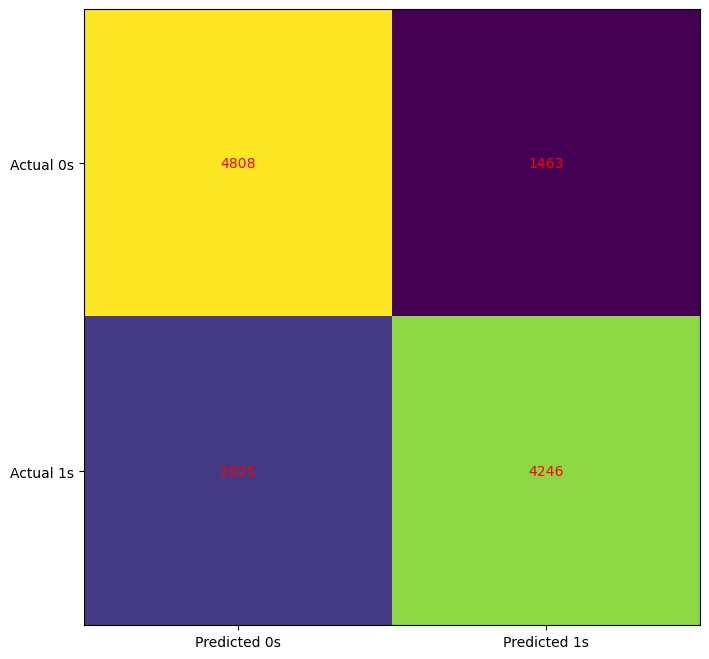

In [14]:
cm = confusion_matrix(y_over, model.predict(X_over))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Find relationship between Quantity and On-time

In [46]:
#Find relationship
model = LogisticRegression(solver='liblinear', random_state=1)
quantity_corr = important_data[['Purchase Order Qty','late_bin']]
quantity_corr = quantity_corr.dropna()
x = quantity_corr.drop(columns=['late_bin'])
y = quantity_corr['late_bin']
X_over, y_over = undersample.fit_resample(x, y)
print(Counter(y_over))
model.fit(X_over, y_over)
model.score(X_over, y_over)

Counter({0: 5149, 1: 5149})


0.4842687900563216

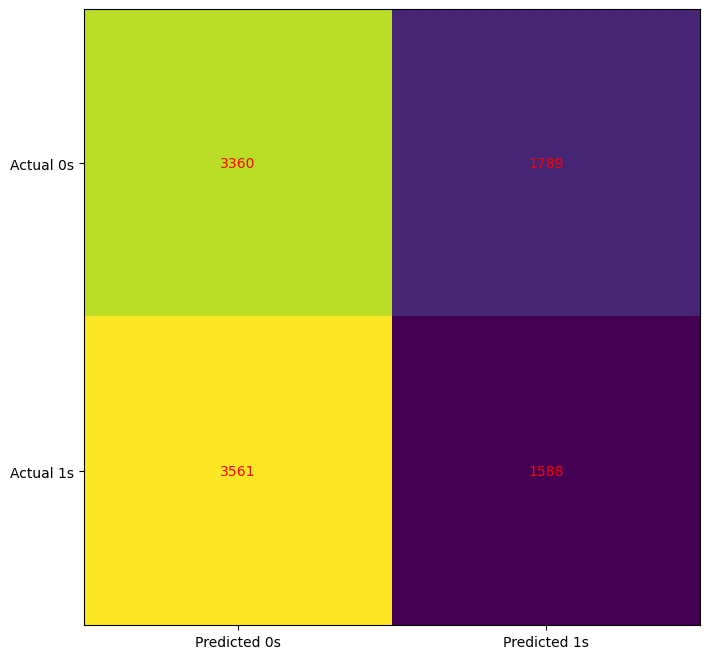

In [25]:
cm = confusion_matrix(y_over, model.predict(X_over))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Find Relationship Between Lead Time and On Time

In [47]:
#Find relationship
model = LogisticRegression(solver='liblinear', random_state=1)
lead_corr = important_data[['expected_lead_time','late_bin']]
x = lead_corr.drop(columns=['late_bin'])
y = lead_corr['late_bin']
X_over, y_over = undersample.fit_resample(x, y)
print(Counter(y_over))
model.fit(X_over, y_over)
model.score(X_over, y_over)

Counter({0: 6271, 1: 6271})


0.5746292457343326

<AxesSubplot:xlabel='expected_lead_time', ylabel='late_bin'>

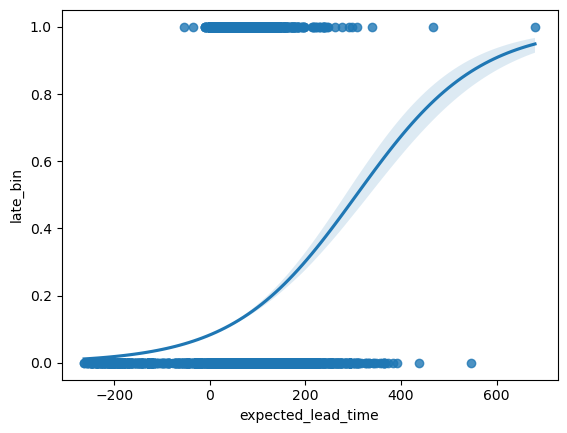

In [52]:
import seaborn as sns
sns.regplot(x='expected_lead_time', y='late_bin', data=lead_corr, logistic=True)

In [56]:
2.78**model.coef_

array([[1.01203751]])

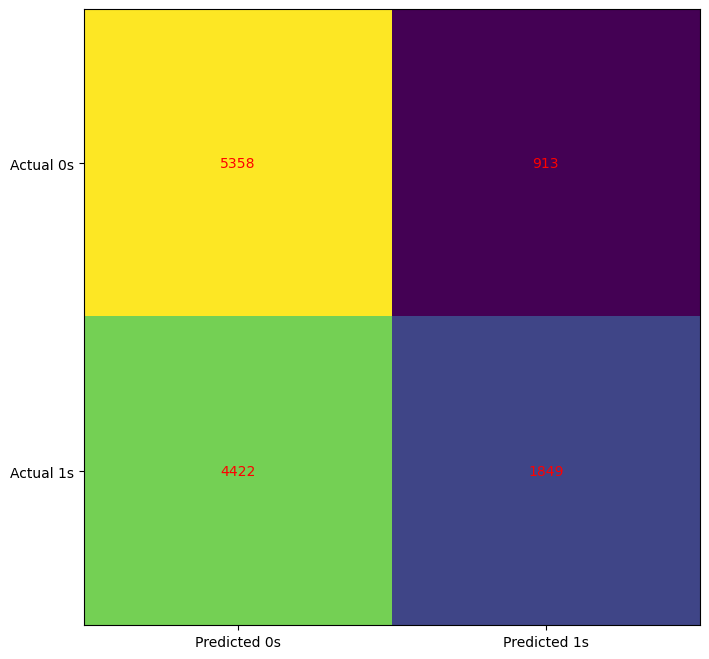

In [29]:
cm = confusion_matrix(y_over, model.predict(X_over))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### All Together

In [30]:
#Find relationship
model = LogisticRegression(solver='liblinear', random_state=1)
model_corr = important_data[['Supplier','Purchase Order Qty','expected_lead_time','late_bin']]
model_corr = pd.get_dummies(model_corr, columns=['Supplier'])
model_corr = model_corr.dropna()
x = model_corr.drop(columns=['late_bin'])
y = model_corr['late_bin']
X_over, y_over = undersample.fit_resample(x, y)
print(Counter(y_over))
model.fit(X_over, y_over)
model.score(X_over, y_over)

Counter({0: 5149, 1: 5149})


0.7371334239658186

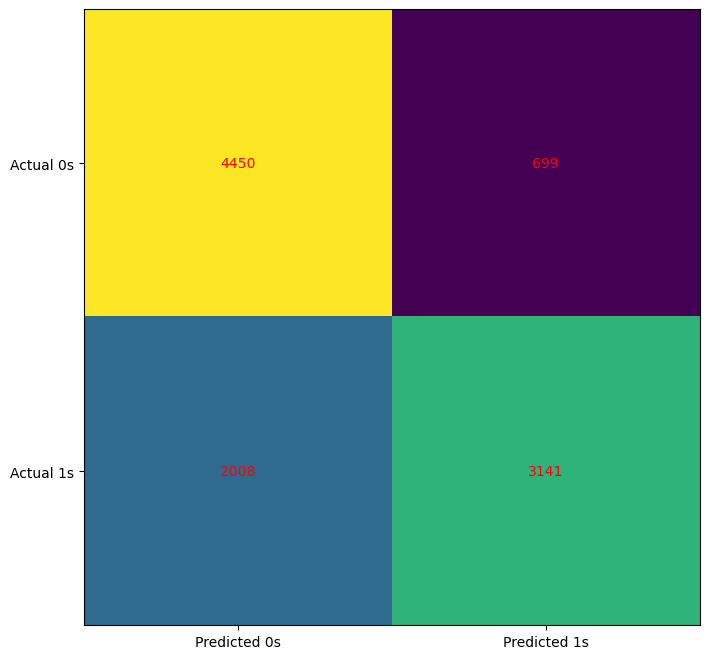

In [31]:
cm = confusion_matrix(y_over, model.predict(X_over))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [57]:
data['Supplier']

0                 ALL METAL DESIGNS INC
1                        ELMO SWEDEN AB
2               SHORELINE CONTAINER LLC
3        ROYAL TECHNOLOGIES CORPORATION
4                 ALL METAL DESIGNS INC
                      ...              
67279           APPLIED INDUSTRIAL TECH
67280            B AND V MECHANICAL INC
67281            B AND V MECHANICAL INC
67282            B AND V MECHANICAL INC
67283                   MAYER-PAETZ INC
Name: Supplier, Length: 67284, dtype: object

In [68]:
royal = data[data['Supplier']=='ROYAL TECHNOLOGIES CORPORATION']
royal['Scheduled_relevant_delivery_date'] = pd.to_datetime(royal['Scheduled_relevant_delivery_date'])
royal['late_bin'] = np.where(royal['days_late']>0, 1, 0)
royal['late_bin'] = 1 - royal['late_bin']
royal = royal.resample('M', on='Scheduled_relevant_delivery_date').late_bin.mean()
royal = royal.reset_index()
royal

/var/folders/ng/clzczwr96wz__2znzb2hjykr0000gn/T/ipykernel_89352/2269869995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  royal['Scheduled_relevant_delivery_date'] = pd.to_datetime(royal['Scheduled_relevant_delivery_date'])
/var/folders/ng/clzczwr96wz__2znzb2hjykr0000gn/T/ipykernel_89352/2269869995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  royal['late_bin'] = np.where(royal['days_late']>0, 1, 0)
/var/folders/ng/clzczwr96wz__2znzb2hjykr0000gn/T/ipykernel_89352/2269869995.py:4: SettingWithCopy

,Scheduled_relevant_delivery_date,late_bin
0,2019-03-31,1.000000
1,2019-04-30,0.997917
2,2019-05-31,0.992016
3,2019-06-30,1.000000
4,2019-07-31,0.996942
5,2019-08-31,1.000000
6,2019-09-30,0.998792
7,2019-10-31,1.000000
8,2019-11-30,1.000000
9,2019-12-31,0.981459


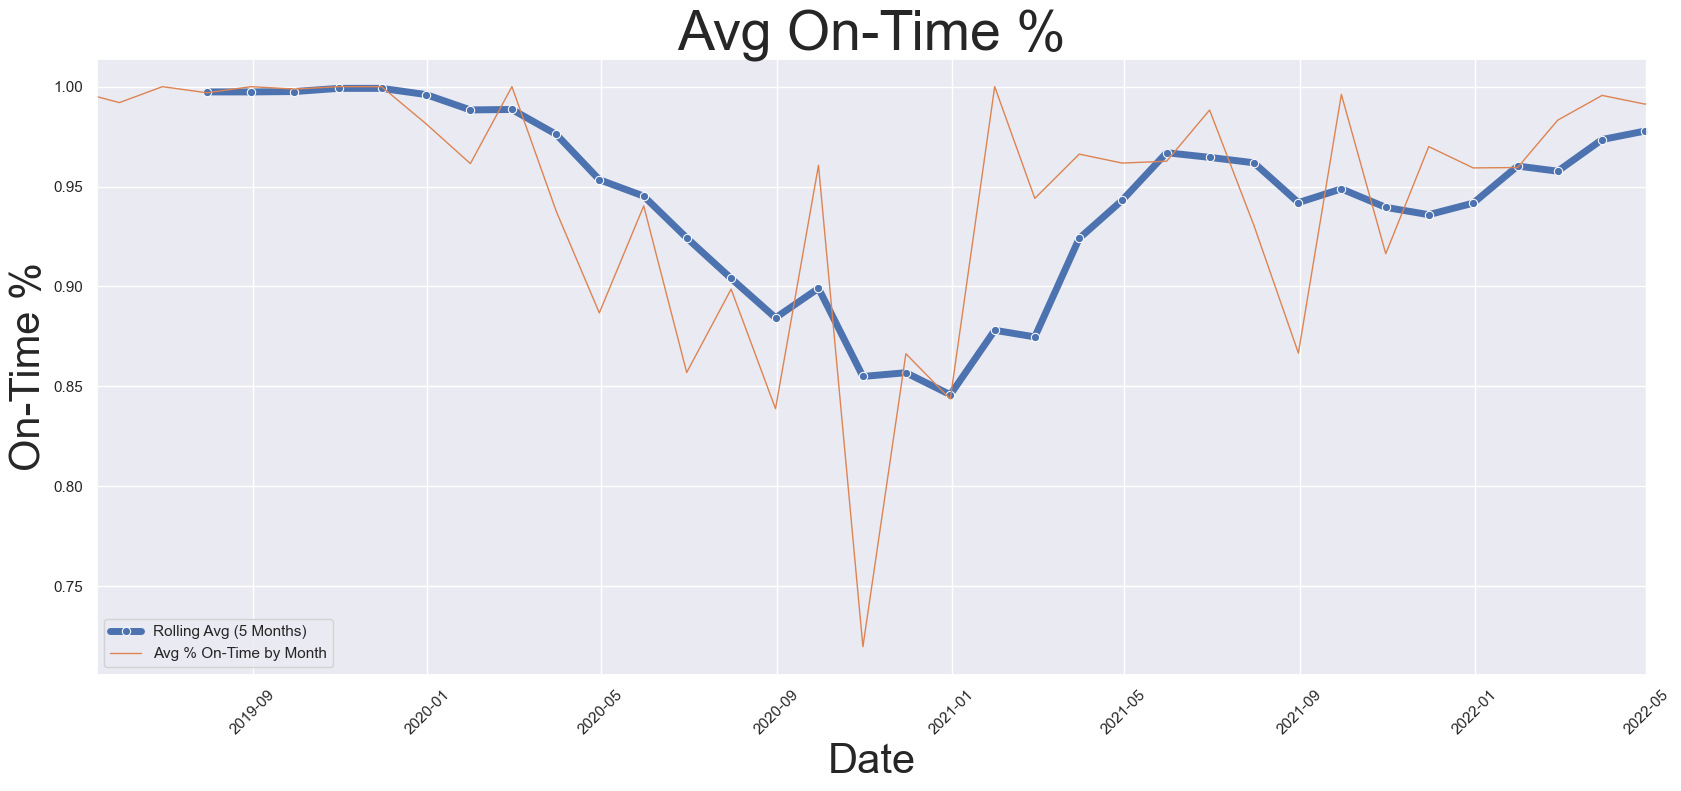

In [69]:
royal['Rolling Avg'] = royal['late_bin'].rolling(5).mean()
sns.set(rc={'figure.figsize':(20,8)})
g = sns.lineplot( x=pd.to_datetime(royal['Scheduled_relevant_delivery_date'], format='%Y-%m-%d'), y=royal['Rolling Avg'], marker='o', lw=5, label="Rolling Avg (5 Months)")
sns.lineplot( x=pd.to_datetime(royal['Scheduled_relevant_delivery_date'], format='%Y-%m-%d'), y=royal['late_bin'], lw=1, label="Avg % On-Time by Month")
g.set_xlabel( "Date" , size = 30 )
g.set_ylabel("On-Time %", size = 30)
g.set_title( "Avg On-Time %" , size = 40 )
plt.xlim(pd.to_datetime('2019-05-15'), pd.to_datetime('2022-05-01'))
# plt.ylim(., 1)
plt.xticks(rotation=45)
plt.savefig('Royal.png')